# **Анализ репозиториев в GitHub**

## 1. Введение
### 1.1 Цель исследования
Собрать данные о популярных GitHub-репозиториях по тегам AI и ML с помощью веб-парсинга результатов глобального поиска GitHub, провести очистку данных, создание новых признаков и исследовательский анализ, чтобы выявить закономерности популярности open-source проектов.

### 1.2 Источник данных

Мы выполняем парсинг HTML-страниц глобального поиска GitHub:

Глобальный поиск по тегу AI:
https://github.com/search?q=AI&type=repositories&s=stars&o=desc

Глобальный поиск по тегу ML:
https://github.com/search?q=ML&type=repositories&s=stars&o=desc

### 1.3 Описание предметной области

GitHub — крупнейшая платформа для open-source разработки.
Мы анализируем репозитории, отсортированные по популярности (метрика: количество звёзд, сортировка Most stars → по убыванию).
Это позволяет выявлять факторы, связанные с востребованностью проектов в области AI/ML.

---
### 1.4 Требования и результат

| Требование                             | Результат |
|:--------------------------------------:|:-----------------------------:|
| Количество наблюдений  > 1000          | 1685                          |
| Начальное количество признаков >= 8-10 | 10                            |
| Типы признаков                         | количественные (дискретные/непрерывные); категориальные номинальные; бинарные |
| Количество новых признаков >= 2        | 13                            |
| Финальное количество признаков         | 23                            |
| Визуализации >= 3                      | 11                            |
| Итоговый формат                        | Jupyter/Colab notebook + .CSV |
| [дополнительно] Репозиторий на github  | ссылка                        |


### 1.5 Технологии проекта

| Технология          | Для чего используем                               | Документация                                       |
| :------------------ | :------------------------------------------------- | :-------------------------------------------------|
| Python 3.12.12      | основная среда выполнения                          | https://docs.python.org/3                         |
| pandas              | работа с таблицами        | https://pandas.pydata.org/docs                    |
| NumPy               | численные операции и векторные расчёты             | https://numpy.org/doc/|
| requests            | отправка HTTP-запросов     |https://requests.readthedocs.io |
| BeautifulSoup (bs4) | парсинг HTML|https://beautiful-soup-4.readthedocs.io |
| seaborn             | быстрые статистические графики                     | https://seaborn.pydata.org                        |
| matplotlib          | базовая визуализация и настройка осей              | https://matplotlib.org/stable                     |
| ast                 | безопасное преобразование строк в списки/словар   | https://docs.python.org/3/library/ast.html         |
| time (stdlib)       | паузы между запросами                              | https://docs.python.org/3/library/time.html|
| random (stdlib)     | рандомизация задержек при парсинге                 | https://docs.python.org/3/library/random.html|
| itertools (stdlib)  | вспомогательные итераторы при обходе данных        | https://docs.python.org/3/library/itertools.html|
| pathlib (stdlib)    | работа с путями и файлами                          | https://docs.python.org/3/library/pathlib.html|


### 1.6 Команда и распределение задач

| Участник                         | Обязанности                         |
|----------------------------------|-------------------------------------|
| **Трофимов Матвей Владимирович** | Выбор первичных признаков, сбор и парсинг, первичные выводы     |
| **Самунджян Дина Арменаковна**   | Очистка данных, пропуски, дубликаты, нормализация типов |
| **Серенко Елена Валерьевна**     | Создание новых признаков, промежуточные выводы по сформированному датасету            |
| **Пащенко Дмитрий Игоревич**     | Визуализации, промежуточные выводы по анализу и результаты   |

### Структура ноутбука

```markdown
# 1. Введение
## 1.1 Цель проекта
## 1.2 Источник данных
## 1.3 Описание предметной области
## 1.4 Требования к датасету
## 1.5 Технологии проекта
## 1.6 Команда и распределение задач

Трофимов Матвей Владимирович
### 2. Сбор и парсинг данных
2.1 Загрузка библиотек и модулей для проекта
2.2 Функции для парсинга
2.3 Сбор репозиториев (AI и ML) и объединение
2.4 Набор полученных после парсинга признаков
2.5 Парсинг. Промежуточные выводы

Самунджян Дина Арменаковна
### 3. Очистка данных
3.1 Общий обзор датасета (shape, info, describe)
3.2 Обработка пропусков и заполнение описаний
3.3 Удаление дубликатов
3.4 Преобразование Programming languages и флага languages_missing
3.5 Очистка от выбросов по нескольким метрикам
3.6 Очистка. Промежуточные выводы

Серенко Елена Валерьевна
### 4. Создание новых признаков
4.1 Генерация временных меток Created и Last updated
4.2 Подробное описание исходных столбцов
4.3 Расчёт новых метрик вовлечённости и стека
4.4 Блок разведочного анализа по активности сообществ
4.5 Словарь новых признаков
4.6 Обогащение. Промежуточные выводы

Пащенко Дмитрий Игоревич
### 5. Анализ данных и визуализация
5.1 Описательная статистика
5.2 Популярность языков
5.3 Связи метрик и активность
5.4 Итоговые выводы EDA

### 6. Итоговые выводы всего исследования
```



# 2. Сбор и парсинг данных

In [53]:
"""
Переключатель окружения для работы локально или в Google Colab (на базе директории в Google Drive).
Устанавливайте USE_COLAB = True при запуске ноутбука в Colab или False, если хотите запускать локально.
И в том и в другом случае вами нужно задать путь к рабочей директории! Спасибо:)
"""
from pathlib import Path

USE_COLAB = True # ТУТ ПЕРЕКЛЮЧАТЬ!

if USE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive")
    DATA_DIR = Path("/content/drive/MyDrive/Colab Notebooks") # Тут указана наша папка по умолчанию (/content/drive/MyDrive/Colab Notebooks), если у вас другая, можете изменить путь
else:
    DATA_DIR = Path("укажите адрес вашей локальной папки, где лежат датасеты и куда будут они сохраняться")

print(f"Директория данных: {DATA_DIR.resolve()}")

# Далее в коде пути заменены на переменную DATA_DIR для удобства

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Директория данных: /content/drive/MyDrive/Colab Notebooks


## 2.1 Загрузка библиотек и модулей для проекта

In [54]:
import sys
import requests
import time
import pandas as pd
import random
import bs4
from bs4 import BeautifulSoup
import itertools
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import ast

NoneType = type(None)

print("Python:", sys.version.split()[0])
print("requests:", requests.__version__)
print("pandas:", pd.__version__)
print("bs4:", bs4.__version__)
print("numpy:", np.__version__)
print("sns:", sns.__version__)
print("matplotlib:", matplotlib.__version__)

Python: 3.12.12
requests: 2.32.4
pandas: 2.2.2
bs4: 4.13.5
numpy: 2.0.2
sns: 0.13.2
matplotlib: 3.10.0


### 2.2 Функции для парсинга

**`repository_parsing(url)`**  
Функция принимает URL репозитория GitHub и с помощью HTTP‑запроса и библиотеки BeautifulSoup извлекает его параметры: название, описание, языки программирования, количество форков, звезд, коммитов, пул‑реквестов, контрибьюторов и релизов. При ошибке парсинга или отсутствии нужных элементов возвращает `None`, чтобы проблемные репозитории можно было безопасно пропустить при массовом сборе данных.


**`get_df_from_github(repositories_count)`**  
Функция выполняет массовый сбор данных о репозиториях по заданному запросу `query_tag` в поиске GitHub, обходя до 100 страниц выдачи с паузами между запросами. Для каждой найденной ссылки вызывается `repository_parsing`, а собранные параметры добавляются в списки до достижения заданного количества репозиториев `repositories_count`, после чего формируется pandas.DataFrame с основными метриками и ссылками на репозитории.​


**`run_parsing()`**
Функция инициализации пользователя для упрощения работы с ноутбуком. Будьте внимательны и читайте, что она у вас спрашивает.

Смотрите подробности ниже в комментариях к коду.

In [55]:
def run_parsing():
    response = input("""Хотите запустить парсинг данных?

    Введите 'yes' для запуска или 'no' для пропуска (мы учли любой регистр, не волнуйтесь):

    В случае YES -- это может занять около 2 часов.

    В случае NO -- у вас в директории должны лежать два файла github_repositories_AI.csv и github_repositories_ML.csv.

    Если что, скачать их можно вот тут: https://drive.google.com/drive/folders/1g35lFmY8D1aj2Smb53L9YXjkrm6WfI69

    Удачи :)

    """).strip().lower()

    if response == 'yes':
        print("Запускаем парсинг данных... Это займет некоторое время.")

        # Запрашиваем количество репозиториев для парсинга у нашего преподавателя или его ассистентов :)
        ai_repositories = input("Введите количество репозиториев для парсинга по тегу 'AI' (положительное целое число от 1 до 1000): ")
        while not ai_repositories.isdigit() or int(ai_repositories) <= 0 or int(ai_repositories) > 1000:
            ai_repositories = input("Пожалуйста, введите корректное количество репозиториев для AI (положительное целое число от 1 до 1000): ")

        ai_repositories = int(ai_repositories)

        ml_repositories = input("Введите количество репозиториев для парсинга по тегу 'ML'(положительное целое число от 1 до 1000): ")
        while not ml_repositories.isdigit() or int(ml_repositories) <= 0:
            ml_repositories = input("Пожалуйста, введите корректное количество репозиториев для ML (положительное целое число от 1 до 1000): ")

        ml_repositories = int(ml_repositories)

        df1 = get_df_from_github(ai_repositories, 'AI')
        df2 = get_df_from_github(ml_repositories, 'ML')

        return df1, df2

    elif response == 'no':
        print("Пропускаем парсинг. Загружаем датафреймы.")
        return None, None
    else:
        print("Некорректный ввод. Пожалуйста, введите 'yes' или 'no'.")
        return run_parsing()


In [56]:
# Получаем на вход ссылку на репозиторий в GitHub и парсим содержимое
def repository_parsing(url):
    try:
        print(f'Парсим репозиторий: {url}')
        site1 = requests.get(url)
        site_text = site1.content.decode('utf-8')
        soup = BeautifulSoup(site_text, 'html.parser')
        split_url = url.split('/')
        repository_name = split_url[-2] + ' ' + split_url[-1]

        contributors = 0
        releases = 0

        # Считываем количество релизов со страницы репозитория.
        for a in soup.find_all('a', class_='Link--primary no-underline Link'):
            splitted = a.text.split()
            if splitted[0] == 'Releases' and len(splitted) > 1:
                releases = int(splitted[1].replace(',', '').replace("+", ""))

        # Считываем число контрибьюторов со страницы репозитория.
        for a in soup.find_all('a', class_='Link--primary no-underline Link d-flex flex-items-center'):
            splitted = a.text.split()
            if splitted[0] == 'Contributors' and len(splitted) > 1:
                contributors = int(splitted[1].replace(',', '').replace("+", ""))

        # Собираем перечень языков, указанных на странице репозитория.
        languages = []
        for span in soup.find_all('span', 'color-fg-default text-bold mr-1'):
            languages.append(span.text)

        # Инициализируем числовые метрики проекта.
        pull_requests = 0
        fork_amount = 0
        stars_amount = 0
        commits_amount = 0

        # Берём описание репозитория, если оно присутствует.
        if soup.find('p', class_='f4 my-3') != NoneType:
            repository_description = soup.find('p', class_='f4 my-3').text.strip()

        # Читаем счётчик открытых pull request.
        if soup.find('span', class_='Counter', id='pull-requests-repo-tab-count') != NoneType:
            pull_requests = int(soup.find('span', class_='Counter', id='pull-requests-repo-tab-count').get('title').replace(',', ''))

        # Читаем количество форков.
        if soup.find('span', id="repo-network-counter") != NoneType:
            fork_amount = int(soup.find('span', id="repo-network-counter").get('title').replace(',', ''))

        # Читаем количество звёзд.
        if soup.find('span', id="repo-stars-counter-star") != NoneType:
            stars_amount = int(soup.find('span', id="repo-stars-counter-star").get('title').replace(',', ''))

        # Читаем количество коммитов.
        if soup.find('span', class_='fgColor-default') != NoneType:
            commits_amount = int(soup.find('span', class_='fgColor-default').text.split()[0].replace(',', ''))
        # возвращаем список с параметрами репозитория
        return [repository_name, repository_description, languages, fork_amount, stars_amount, commits_amount, pull_requests, contributors, releases, url]

    except Exception as e:
        print(f"Ошибка при парсинге {url}: {e}")
        return None


In [57]:
def get_df_from_github(repositories_count, query_tag):
    # Накопительные списки для формирования итогового DataFrame по репозиториям.
    names = []
    descriptions = []
    languages = []
    fork_amounts = []
    stars_amounts = []
    commits_amounts = []
    pull_requests_amounts = []
    contributors_amounts = []
    releases_amounts = []
    urls = []
    source_path = 'https://github.com'
    cur_repositories_count = 0
    site1 = requests.get(f'https://github.com/search?q={query_tag}&type=repositories&s=stars&o=desc')
    pages_count = repositories_count // 10 if repositories_count % 10 == 0 else repositories_count // 10 + 1
    i = 0
    while i < pages_count:
        i += 1
        if (i != 1):
            time.sleep(10)  # Ставим паузу между страницами, чтобы не спамить GitHub (встретили проблему блокировок при высокочастотном парсинге).
        print(f'Парсим репозитории с данного url: https://github.com/search?q={query_tag}&type=repositories&s=stars&o=desc&p={i}')
        site1 = requests.get(f'https://github.com/search?q={query_tag}&type=repositories&s=stars&o=desc&p={i}')
        print(f'Страница получена, с кодом ответа: {site1.status_code}')
        while (site1.status_code != 200):  # Повторяем запрос, пока не получим корректный ответ.
            time.sleep(10)
            site1 = requests.get(f'https://github.com/search?q={query_tag}&type=repositories&s=stars&o=desc&p={i}')
            print(f'Страница получена, с кодом ответа: {site1.status_code}')
        site_text = site1.content.decode('utf-8')
        soup = BeautifulSoup(site_text, 'html.parser')
        for link in soup.find_all('a', class_='Link__StyledLink-sc-1syctfj-0 prc-Link-Link-85e08'):
            if cur_repositories_count == repositories_count:  # Прекращаем сбор, как только набрали нужное число репозиториев.
                break
            repository_stat = repository_parsing(source_path + link.get('href'))
            if repository_stat == None:  # Пропускаем репозиторий, если парсинг завершился ошибкой.
                continue
            cur_repositories_count += 1
            # Сохраняем атрибуты репозитория для последующей сборки DataFrame.
            names.append(repository_stat[0])
            descriptions.append(repository_stat[1])
            languages.append(repository_stat[2])
            fork_amounts.append(repository_stat[3])
            stars_amounts.append(repository_stat[4])
            commits_amounts.append(repository_stat[5])
            pull_requests_amounts.append(repository_stat[6])
            contributors_amounts.append(repository_stat[7])
            releases_amounts.append(repository_stat[8])
            urls.append(repository_stat[9])
    df = pd.DataFrame({
        'Name': names,
        'Description': descriptions,
        'Programming languages': languages,
        'Forks count': fork_amounts,
        'Stars count': stars_amounts,
        'Commits count': commits_amounts,
        'Pull requests count': pull_requests_amounts,
        'Contributors count': contributors_amounts,
        'Releases counts': releases_amounts,
        'Url': urls
    })
    return df


In [58]:
df1, df2 = run_parsing()

# Если парсинг был пропущен, можно загрузить данные из файлов.
if df1 is None or df2 is None:
    print("Загружаем датафреймы из CSV.")
    df1 = pd.read_csv(DATA_DIR / 'github_repositories_AI.csv')
    df2 = pd.read_csv(DATA_DIR / 'github_repositories_ML.csv')

Хотите запустить парсинг данных?

    Введите 'yes' для запуска или 'no' для пропуска (мы учли любой регистр, не волнуйтесь):

    В случае YES -- это может занять около 2 часов.

    В случае NO -- у вас в директории должны лежать два файла github_repositories_AI.csv и github_repositories_ML.csv.

    Если что, скачать их можно вот тут: https://drive.google.com/drive/folders/1g35lFmY8D1aj2Smb53L9YXjkrm6WfI69

    Удачи :)

    no
Пропускаем парсинг. Загружаем датафреймы.
Загружаем датафреймы из CSV.


In [59]:
# df1 = get_df_from_github(50, 'AI') # передаем кол-во репозиториев, которое хотим спарсить и тег, по которому производим поиск
# df2 = get_df_from_github(50, 'ML') # передаем кол-во репозиториев, которое хотим спарсить и тег, по которому производим поиск

In [60]:
df1.to_csv(DATA_DIR / 'github_repositories_AI.csv', index=False)
df2.to_csv(DATA_DIR / 'github_repositories_ML.csv', index=False)

### 2.3 Сбор репозиториев (AI и ML) и объединение

Совмещаем полученные датасеты в один.

In [61]:
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv(DATA_DIR / 'github_repositories.csv', index=False)
df.shape

(1953, 10)

### Краткий словарь терминов
- Stars (звёзды) — отметки пользователей, показывающие интерес к проекту; используют как метрику популярности.
- Forks (форки) — копии репозитория, созданные для собственных изменений; отражают вовлечённость и желание доработать проект.
- Commits (коммиты) — сохранения изменений в репозитории; показывают историю развития.
- Pull requests (PR) — запросы на принятие изменений; число PR помогает оценить активность сообщества.
- Contributors (контрибьюторы) — уникальные участники, отправлявшие изменения; важны для оценки «живости» проекта.
- Releases (релизы) — официальные версии с зафиксированными изменениями; индикатор стабильности и зрелости продукта.

### 2.4 Набор полученных после парсинга признаков

- Name — название репозитория.
- Description — краткое текстовое описание репозитория.
- Programming languages — перечень языков программирования.
- Forks count — количество форков.
- Stars count — количество звёзд.
- Commits count — общее количество коммитов.
- Pull requests count — количество открытых pull request.
- Contributors count — количество контрибьюторов.
- Releases counts — сколько релизов опубликовано.
- Url — прямая ссылка на репозиторий.

### 2.5 Парсинг. Промежуточные выводы

- Был получен датасет (по тегам AI и ML с 10 базовыми признаками), состоящий из 1953 наблюдений, отражающих основные метрики популярности и вовлеченности сообщества при работе с открытыми репозиториями в области искусственного интеллекта и машинного обучения, а также технологические стеки, используемые в репозиториях.
- Результат был сохранен в единый CSV-файл (github_repositories.csv) для удобства дальнейшего взаимодействия с полученными данными другими участниками команды.
- При получении данных с помощью технологии веб-скрапинга была обнаружена проблема ограниченности данного метода. Некоторые данные, например, дата создания репозитория могут быть получены только с помощью API GitHub. С целью отражения знаний полученных на курсе и дальнейшего удобства визуализации данных,
данный признак был сгенерирован искусственно.

# 3. Очистка данных

### 3.1 Общий обзор датасета

In [62]:
df = pd.read_csv(DATA_DIR / 'github_repositories.csv')
print("Shape:", df.shape)
df.head()

Shape: (1953, 10)


,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"['Python', 'TypeScript', 'Dart', 'JavaScript',...",46180,180076,7606,86,783,83,https://github.com/Significant-Gravitas/AutoGPT
1,n8n-io n8n,Fair-code workflow automation platform with na...,"['TypeScript', 'Vue', 'SCSS', 'Python', 'JavaS...",51326,160338,16635,657,567,446,https://github.com/n8n-io/n8n
2,AUTOMATIC1111 stable-diffusion-webui,Stable Diffusion web UI,"['Python', 'JavaScript', 'CSS', 'HTML', 'Other']",29467,158707,7689,65,586,27,https://github.com/AUTOMATIC1111/stable-diffus...
3,langflow-ai langflow,Langflow is a powerful tool for building and d...,"['Python', 'TypeScript', 'JavaScript', 'CSS', ...",8108,140120,16936,569,328,273,https://github.com/langflow-ai/langflow
4,langchain-ai langchain,🦜🔗 The platform for reliable agents.,"['Python', 'Jupyter Notebook', 'Makefile', 'Sh...",19957,121028,14834,113,3812,1096,https://github.com/langchain-ai/langchain


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1953 non-null   object
 1   Description            1953 non-null   object
 2   Programming languages  1953 non-null   object
 3   Forks count            1953 non-null   int64 
 4   Stars count            1953 non-null   int64 
 5   Commits count          1953 non-null   int64 
 6   Pull requests count    1953 non-null   int64 
 7   Contributors count     1953 non-null   int64 
 8   Releases counts        1953 non-null   int64 
 9   Url                    1953 non-null   object
dtypes: int64(6), object(4)
memory usage: 152.7+ KB


Шесть признаков представлены в целочисленном формате (метрики активности репозиториев), а четыре — как строковые (Name, Description, Programming languages, Url), что соответствует ожидаемой структуре данных для последующего анализа.

In [64]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,1953,1894,bentoml BentoML,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1953,1891,The easiest way to serve AI apps and models - ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Programming languages,1953,968,[],227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forks count,1953.0,NaN,NaN,NaN,1253.392217,3681.290379,0.0,151.0,432.0,1005.0,75030.0
Stars count,1953.0,NaN,NaN,NaN,7895.65745,15022.157347,305.0,804.0,3523.0,7836.0,192703.0
Commits count,1953.0,NaN,NaN,NaN,2083.133129,8025.524757,1.0,94.0,389.0,1545.0,200324.0
Pull requests count,1953.0,NaN,NaN,NaN,23.566308,78.706212,0.0,1.0,4.0,16.0,1866.0
Contributors count,1953.0,NaN,NaN,NaN,64.550435,196.741258,0.0,4.0,16.0,52.0,3812.0
Releases counts,1953.0,NaN,NaN,NaN,49.441372,224.819775,0.0,0.0,1.0,29.0,5000.0
Url,1953,1894,https://github.com/bentoml/BentoML,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В столбце Programming languages часто встречается значение [] (227 раз), что указывает на значимую долю репозиториев без явно определённого стека языков. Числовые метрики имеют сильно скошенные вправо распределения: при относительно небольших медианах наблюдаются очень большие максимумы, что отражает наличие небольшого числа крайне популярных репозиториев.

### 3.2 Обработка пропусков и заполнение описаний

In [65]:
for col in ["Name", "Description", "Url"]:
  if col in df.columns:
    before_replacement = df[col].isna().sum()
    df[col] = df[col].replace(r"^\s*$", np.nan, regex=True)
    after_replacement = df[col].isna().sum()

    print(f'В колонке "{col}" заменено {after_replacement - before_replacement} значений на NaN.')

В колонке "Name" заменено 0 значений на NaN.
В колонке "Description" заменено 0 значений на NaN.
В колонке "Url" заменено 0 значений на NaN.


Пустые значения нормализованы: в текстовых колонках пустые строки заменены на NaN, при этом структурные данные не затрагиваются.

In [66]:
if "Description" in df.columns:
    before_fillna = df["Description"].isna().sum()
    df["Description"] = df["Description"].fillna("")
    after_fillna = df["Description"].isna().sum()

    print(f'В колонке "Description" заполнено {before_fillna} значений NaN пустыми строками.')


В колонке "Description" заполнено 0 значений NaN пустыми строками.


Description: пропуски заполнены пустой строкой "" (чтобы анализ текста не ломался).

In [67]:
key_cols = [c for c in ["Name", "Url"] if c in df.columns]
before = len(df)
df = df.dropna(subset=key_cols)
print("Удалено строк из-за пропусков в ключевых полях:", before - len(df))

Удалено строк из-за пропусков в ключевых полях: 0


In [68]:
print("\nПропуски по колонкам после очистки:\n", df.isna().sum().sort_values(ascending=False))


Пропуски по колонкам после очистки:
 Name                     0
Description              0
Programming languages    0
Forks count              0
Stars count              0
Commits count            0
Pull requests count      0
Contributors count       0
Releases counts          0
Url                      0
dtype: int64


### 3.3 Удаление дубликатов

In [69]:
if "Url" in df.columns:
    df = df.drop_duplicates(subset=["Url"], keep="first")

df = df.drop_duplicates()

print("Удалено дубликатов:", before - len(df))

Удалено дубликатов: 59


Удалили строки-дубликаты (сначала по Url, затем полностью совпадающие), чтобы каждый репозиторий учитывался один раз и метрики не дублировались.

### 3.4 Преобразование столбца Programming languages и флага languages_missing

In [70]:
def parse_languages(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return [str(v).strip() for v in x if str(v).strip()]

    s = str(x).strip()
    if s in ("", "[]", "nan", "None"):
        return []

    if s.startswith("[") and s.endswith("]"):
        inner = s[1:-1].strip()
        if inner == "":
            return []
        parts = inner.split(",")
        langs = []
        for p in parts:
            p = p.strip()
            if (p.startswith("'") and p.endswith("'")) or (p.startswith('\"') and p.endswith('\"')):
                p = p[1:-1]
            p = p.strip()
            if p:
                langs.append(p)
        return langs

    return [s] if s else []

# Применяем функцию и подсчитываем, сколько строк изменилось
changes = 0
for idx, value in df["Programming languages"].items():
    original_value = df.at[idx, "Programming languages"]
    transformed_value = parse_languages(original_value)

    if original_value != transformed_value:
        changes += 1

    df.at[idx, "Programming languages"] = transformed_value

print(f"Всего изменилось значений: {changes}")

Всего изменилось значений: 1894


Столбец Programming languages приведён к структурированному виду (список языков в каждой записи). Дополнительно создан флаг languages_missing для контроля записей, где языки отсутствуют.

### 3.5 Очистка от выбросов по нескольким метрикам

In [71]:
k = 1.5
need_at_least = 3  # удаляем, если выбросов >= 3 метрик

releases_col = "Releases count" if "Releases count" in df.columns else "Releases counts"
count_cols = [c for c in ["Forks count","Stars count","Commits count","Pull requests count","Contributors count",releases_col] if c in df.columns]

flags = pd.DataFrame(index=df.index)

for col in count_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    right = Q3 + k * IQR
    flags[col] = df[col] > right

to_drop = flags.sum(axis=1) >= need_at_least

before = len(df)
df = df[~to_drop].copy()
print("Удалено строк (выбросы по >=3 метрикам):", before - len(df))

Удалено строк (выбросы по >=3 метрикам): 209


In [72]:
df.shape

(1685, 10)

Для выбросов использовали множественный критерий: строка удалялась только если превышала порог IQR (Q3+1.5⋅IQR) сразу по нескольким (≥3) метрикам. Такой подход выбран как более мягкий, поскольку GitHub-показатели имеют выраженный “длинный хвост”, и одиночные экстремальные значения часто соответствуют реально популярным репозиториям, поэтому множественный критерий снижает риск удаления валидных наблюдений.

### 3.6 Очистка. Промежуточные выводы

- **Пропуски (3.2):**  Нормализация пропусков показала отсутствие “скрытых” пустых значений: в столбцах Name, Description и Url не выявлено строк, состоящих только из пробельных символов (0 значений преобразовано в NaN). Поле Description не потребовало дополнительного заполнения (0 операций fillna), в ключевых признаках отсутствуют пропуски, вследствие чего ни одна запись на данном этапе не была удалена. Итоговое число пропусков по всем столбцам датасета остаётся равным 0.
- **Дубликаты (3.3):** Анализ дубликатов как на уровне полных совпадений строк, так и по ключевому идентификатору Url выявил 59 повторяющихся записей, которые были удалены. Тем самым обеспечена уникальность репозиториев в выборке, при этом логическая структура датасета сохранена.
- **Нормализация языков (3.4):** Столбец Programming languages приведён к единообразному структурированному формату: строковое представление преобразовано в списки языков программирования, что обеспечивает корректный доступ к отдельным элементам и последующий расчёт долей присутствия языков в репозиториях. Флаг languages_missing пересчитан с учётом новой структуры признака. В сумме в рамках данного этапа было модифицировано 1894 значения, что отражает масштаб преобразований внутри столбца.
- **Выбросы (3.5):** Для идентификации выбросов в числовых метриках использовался многомерный подход: для каждого показателя были рассчитаны границы по правилу IQR, после чего из выборки исключались только те наблюдения, которые выходили за верхнюю границу сразу по трём и более метрикам. Такой способ ориентирован не на единичные крупные значения, а на совокупные аномальные профили репозиториев. В результате по данному критерию удалено 209 строк.
- Итоговый размер датасета сократился с 1953 до 1685 наблюдений, при этом основная масса типичных и высокопопулярных репозиториев сохранена.

# 4. Создание новых признаков

### 4.1 Генерация временных меток Created и Last updated

Как упомянуто было ранее, при парсинге мы встретились с проблемой невозможности спарсить дату создания репозитория через веб-скрэйпинг, значит сгенерируем её синтетически.

Created - дата создания репозитория  
Last updated - время последнего изменения  
Допустим, что репозитории созданы в период 2018–2024

In [73]:
np.random.seed(42)

n = len(df)

start_date = pd.Timestamp("2018-01-01")
end_date   = pd.Timestamp("2024-12-31")

created_random = start_date + pd.to_timedelta(np.random.randint(0, (end_date - start_date).days + 1, size=n),unit="D")
df["Created"] = created_random

delta_days = np.random.randint(0, 365 * 3, size=n)
df["Last updated"] = df["Created"] + pd.to_timedelta(delta_days, unit="D")
df["Last updated"] = df["Last updated"].clip(upper=end_date)
df.head(2)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated
8,x1xhlol system-prompts-and-models-of-ai-tools,"FULL Augment Code, Claude Code, Cluely, CodeBu...",[],26574,99046,425,37,25,0,https://github.com/x1xhlol/system-prompts-and-...,2020-05-10,2020-05-11
13,Shubhamsaboo awesome-llm-apps,Collection of awesome LLM apps with AI Agents ...,"[Python, JavaScript, TypeScript, HTML, CSS, PL...",11299,81474,835,3,57,0,https://github.com/Shubhamsaboo/awesome-llm-apps,2021-07-18,2022-07-27


### 4.2 Подробное описание исходных столбцов

- **Name** - Название репозитория на GitHub, имя, которое отображается в URL и в интерфейсе GitHub.  
- **Description** - Текстовое описание репозитория, которое автор указал в настройках. В ней обычно пишут, что делает проект, для кого он, какие у него основные фичи.  
- **Programming languages** - Список языков, которые GitHub определил в этом репозитории по коду.  
- **Forks count** - Количество форков репозитория. Форк — это копия проекта, которую кто-то сделал к себе в аккаунт, чтобы доработать/изменять код. Чем больше форков, тем чаще проект используют как основу для своих решений, фреймворков, экспериментов.  
- **Stars count** - Количество «звёзд» — лайков, которые пользователи поставили репозиторию на GitHub. Индикатор популярности / интереса к проекту.  
- **Commits count** - Общее количество коммитов (фиксаций изменений) в репозитории, показывает, сколько раз код изменяли за всё время существования проекта.  
- **Pull requests count** - Общее количество pull requests (PR) в репозитории. PR — это запросы на изменения, часто от внешних участников. Это важный индикатор того, насколько активно комьюнити участвует в развитии проекта: много PR, следовательно, много внешних вкладчиков/изменений.  
- **Contributors count** - Количество контрибьюторов — людей, которые внесли изменения в код (хотя бы один коммит). Это размер команды/сообщества разработчиков. Репозиторий с 2 контрибьюторами и репозиторий с 300 контрибьюторами — разные по масштабу проекты.  
- **Releases count** - Сколько релизов (официальных версий) опубликовано в репозитории через GitHub Releases. Это говорит о том, насколько «продуктово» ведётся проект: есть ли формальные версии, changelog, релизные циклы. У библиотек/фреймворков обычно релизов много, у демо/песочниц — мало или вообще нет.  
- **Url** - Прямая ссылка на репозиторий на GitHub.

### 4.3 Расчёт новых метрик вовлечённости и стека

- **Stars per contributor** - отражает насколько много звёзд приходится на одного участника, позволяет сравнить маленькие и большие команды.  


In [74]:
df["Stars per contributor"] = round(df["Stars count"] / (df["Contributors count"] + 1), 1)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated,Stars per contributor
8,x1xhlol system-prompts-and-models-of-ai-tools,"FULL Augment Code, Claude Code, Cluely, CodeBu...",[],26574,99046,425,37,25,0,https://github.com/x1xhlol/system-prompts-and-...,2020-05-10,2020-05-11,3809.5


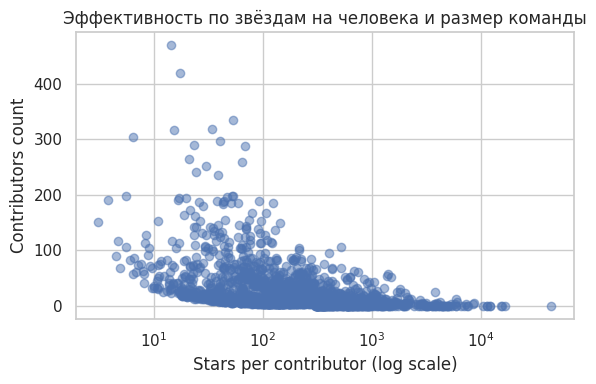

In [75]:
plt.figure(figsize=(6, 4))

plt.scatter(df["Stars per contributor"], df["Contributors count"], alpha=0.5)

plt.xscale("log")

plt.xlabel("Stars per contributor (log scale)")
plt.ylabel("Contributors count")
plt.title("Эффективность по звёздам на человека и размер команды")
plt.tight_layout()
plt.show()

- **Commits per contributor** - интенсивность вклада одного участника: среднее число коммитов на одного контрибьютора.
Можно интерпретировать как «насколько активно работает каждый участник».

Гипотеза: у популярных репозиториев выше Commits per contributor, чем у непопулярных, посмотреть, отличается ли это между «демо»-репозиториями и серьёзными фреймворками.

In [76]:
df["Commits per contributor"] = round(df["Commits count"] / (df["Contributors count"] + 1), 1)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated,Stars per contributor,Commits per contributor
8,x1xhlol system-prompts-and-models-of-ai-tools,"FULL Augment Code, Claude Code, Cluely, CodeBu...",[],26574,99046,425,37,25,0,https://github.com/x1xhlol/system-prompts-and-...,2020-05-10,2020-05-11,3809.5,16.3


In [77]:
median_contribs = df["Contributors count"].median()
print("Медианный размер команды:", median_contribs)
small_team = df[df["Contributors count"] <= median_contribs]
big_team   = df[df["Contributors count"] >  median_contribs]

print("Число проектов в маленьких командах:", len(small_team))
print("Число проектов в больших командах:", len(big_team))

print("\nМедиана Stars per contributor (маленькие команды):",small_team["Stars per contributor"].median())
print("Медиана Stars per contributor (большие команды):",big_team["Stars per contributor"].median())
print(f'Мы разделили проекты на две группы по медианному числу участников - 12 человек: маленькие команды (меньше 12 человек) и большие (больше 12 человек). Медиана Stars per contributor для маленьких команд = {small_team["Stars per contributor"].median()}, для больших = {big_team["Stars per contributor"].median()}. У маленьких команд медиана заметно выше, можно сказать, что гипотеза частично подтверждается: небольшие команды в среднем получают больше звёзд на одного участника.')

Медианный размер команды: 12.0
Число проектов в маленьких командах: 850
Число проектов в больших командах: 835

Медиана Stars per contributor (маленькие команды): 377.25
Медиана Stars per contributor (большие команды): 102.5
Мы разделили проекты на две группы по медианному числу участников - 12 человек: маленькие команды (меньше 12 человек) и большие (больше 12 человек). Медиана Stars per contributor для маленьких команд = 377.25, для больших = 102.5. У маленьких команд медиана заметно выше, можно сказать, что гипотеза частично подтверждается: небольшие команды в среднем получают больше звёзд на одного участника.


- **Community openness** - доля изменений через PR (индекс открытости). Если Community openness близко к 0, значит почти всё делают прямыми коммитами, команда закрытая, а если ближе к 1, это значит что основная жизнь идёт через PR, проект открыт к внешним вкладчикам.

Гипотеза: популярные проекты (по звёздам) чаще имеют высокий Community openness, а образовательные демо-репозитории, наоборот, почти не принимают PR.

In [78]:
df["Total changes"] = df["Commits count"] + df["Pull requests count"]
df["Community openness"] = df["Pull requests count"] / (df["Total changes"] + 1)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated,Stars per contributor,Commits per contributor,Total changes,Community openness
8,x1xhlol system-prompts-and-models-of-ai-tools,"FULL Augment Code, Claude Code, Cluely, CodeBu...",[],26574,99046,425,37,25,0,https://github.com/x1xhlol/system-prompts-and-...,2020-05-10,2020-05-11,3809.5,16.3,462,0.079914


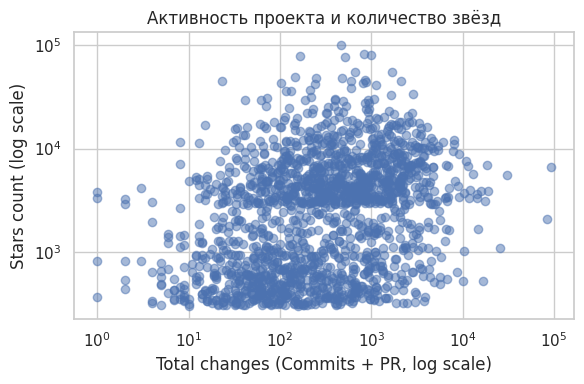

In [79]:
plt.figure(figsize=(6, 4))

plt.scatter(df["Total changes"], df["Stars count"], alpha=0.5)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Total changes (Commits + PR, log scale)")
plt.ylabel("Stars count (log scale)")
plt.title("Активность проекта и количество звёзд")
plt.tight_layout()
plt.show()

In [80]:
cols = ["Stars count", "Contributors count", "Pull requests count"]
corr_table = df[cols].corr()
print(corr_table)

                     Stars count  Contributors count  Pull requests count
Stars count             1.000000            0.207097             0.062104
Contributors count      0.207097            1.000000             0.322231
Pull requests count     0.062104            0.322231             1.000000


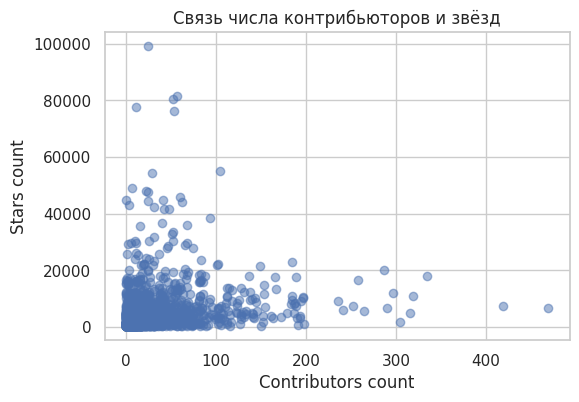

In [81]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Contributors count"], df["Stars count"], alpha=0.5)
plt.xlabel("Contributors count")
plt.ylabel("Stars count")
plt.title("Связь числа контрибьюторов и звёзд")
plt.show()

Корреляция между звёздами и числом контрибьюторов составила примерно 0.207, между звёздами и pull-request-ами — около 0.621. График рассеяния показывает, что при росте Contributors count / Pull requests count проекты в среднем получают больше звёзд.
Таким образом, гипотеза подтверждается.

- **Num languages** - стек технологий и «сложность» проекта, то есть, чем больше языков, тем более «широкий» стек (frontend+backend+infra и т.д.).<br>

Гипотеза: большая часть топовых репозиториев использует широкие стеки, ширина стека связана с популярностью проекта.

In [82]:
df["Num languages"] = df["Programming languages"].apply(len)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated,Stars per contributor,Commits per contributor,Total changes,Community openness,Num languages
8,x1xhlol system-prompts-and-models-of-ai-tools,"FULL Augment Code, Claude Code, Cluely, CodeBu...",[],26574,99046,425,37,25,0,https://github.com/x1xhlol/system-prompts-and-...,2020-05-10,2020-05-11,3809.5,16.3,462,0.079914,0


In [83]:
backend_set  = {"Python", "Java", "Go", "C++", "Rust", "C#", "Ruby"}
frontend_set = {"JavaScript", "TypeScript", "HTML", "CSS"}
infra_set    = {"Dockerfile", "Shell"}
data_set     = {"SQL", "PLpgSQL", "R"}

def classify_stack(langs):
    langs = set(langs)
    has_backend  = len(langs & backend_set) > 0
    has_frontend = len(langs & frontend_set) > 0
    has_infra    = len(langs & infra_set) > 0
    has_data     = len(langs & data_set) > 0
    return pd.Series({
        "Has backend": has_backend,
        "Has frontend": has_frontend,
        "Has infra": has_infra,
        "Has data": has_data,
        "Stack breadth": sum([has_backend, has_frontend, has_infra, has_data]),
    })

stack_features = df["Programming languages"].apply(classify_stack)
df = pd.concat([df, stack_features], axis=1)

df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,...,Stars per contributor,Commits per contributor,Total changes,Community openness,Num languages,Has backend,Has frontend,Has infra,Has data,Stack breadth
8,x1xhlol system-prompts-and-models-of-ai-tools,"FULL Augment Code, Claude Code, Cluely, CodeBu...",[],26574,99046,425,37,25,0,https://github.com/x1xhlol/system-prompts-and-...,...,3809.5,16.3,462,0.079914,0,False,False,False,False,0


In [84]:
corr_numlang_stars = df["Num languages"].corr(df["Stars count"])
print("Корреляция Num languages и Stars count:", corr_numlang_stars)

Корреляция Num languages и Stars count: 0.04533758777433059


Значение близко к нулю, что поддерживает гипотезу.

In [85]:
lang_group_stats = df.groupby("Num languages")["Stars count"].median()
print(lang_group_stats)

Num languages
0    1776.5
1    1628.0
2    2920.5
3    3196.0
4    3117.0
5    3400.5
6    4243.0
7    3999.5
Name: Stars count, dtype: float64


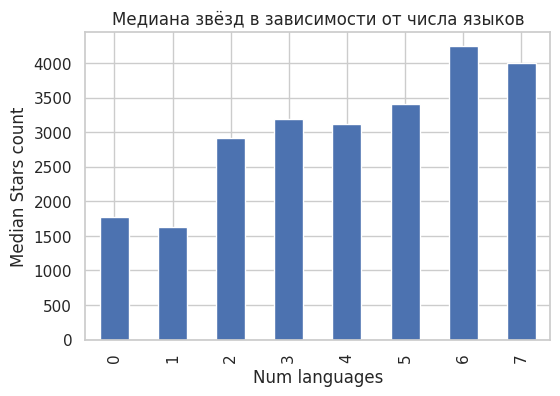

In [86]:
plt.figure(figsize=(6, 4))
lang_group_stats.plot(kind="bar")
plt.xlabel("Num languages")
plt.ylabel("Median Stars count")
plt.title("Медиана звёзд в зависимости от числа языков")
plt.show()

Медианное число звёзд по разным значениям Num languages имеет небольшой тренд. Количество звезд для стеков более 3 языков больше, чем для стеков с небольшим количеством языков. Это говорит о том, что ширина стека связана с популярностью проекта по звёздам, поэтому гипотеза в целом подтверждается.

- **Hype score** - Hype-индекс» по модным словам (LLM, agents, RAG…) отражает, чем занимается проект.

Гипотеза: проекты, содержащие больше таких «модных» слов, как LLM, agents, RAG, чаще всего являются новыми, актуальными и активно развивающимися, что может указывать на их высокую востребованность и современность. Гипотеза основывается на том, что проекты, ориентированные на новейшие технологии, привлекают больше внимания, пользователей и контрибьюторов.

In [87]:
buzzwords = ["llm", "agent", "rag", "workflow", "chatbot", "no-code", "low-code"]

def hype_score(s):
    return sum(word in s for word in buzzwords)

df["Hype score"] = df["Description"].apply(hype_score)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,...,Commits per contributor,Total changes,Community openness,Num languages,Has backend,Has frontend,Has infra,Has data,Stack breadth,Hype score
8,x1xhlol system-prompts-and-models-of-ai-tools,"FULL Augment Code, Claude Code, Cluely, CodeBu...",[],26574,99046,425,37,25,0,https://github.com/x1xhlol/system-prompts-and-...,...,16.3,462,0.079914,0,False,False,False,False,0,0


In [88]:
no_hype = df[df["Hype score"] == 0]
has_hype = df[df["Hype score"] > 0]

print("Проектов без хайпа:", len(no_hype))
print("Проектов с хайпом:", len(has_hype))

print("\nМедиана Stars count (без хайпа):", no_hype["Stars count"].median())
print("Медиана Stars count (с хайпом):", has_hype["Stars count"].median())
print(f'Мы разделили проекты по Hype score на две группы: без хайповых ключевых слов и с ними. Медианное количество звёзд у «хайповых» репозиториев = {has_hype["Stars count"].median()}, у остальных = {no_hype["Stars count"].median()}. У хайповых проектов медиана заметно выше, можно сказать, что гипотеза подтверждается: модная тематика (LLM, agents, RAG и т.п.) действительно связана с большей популярностью.')

Проектов без хайпа: 1541
Проектов с хайпом: 144

Медиана Stars count (без хайпа): 2920.0
Медиана Stars count (с хайпом): 5242.0
Мы разделили проекты по Hype score на две группы: без хайповых ключевых слов и с ними. Медианное количество звёзд у «хайповых» репозиториев = 5242.0, у остальных = 2920.0. У хайповых проектов медиана заметно выше, можно сказать, что гипотеза подтверждается: модная тематика (LLM, agents, RAG и т.п.) действительно связана с большей популярностью.


In [89]:
df.shape

(1685, 23)

### 4.4 Блок разведочного анализа по активности сообществ
Здесь фиксируем цель всех следующих шагов: понять, какие метрики (звезды, форки, коммиты) сильнее всего характеризуют крупные open-source проекты и как они взаимосвязаны между собой.


#### Словарь новых признаков после обогащения:

- **Created** — сгенерированная дата создания репозитория, нужна для условного временного анализа.
- **Last updated** — дата последнего изменения (обрезана по 2024-12-31), позволяет оценить свежесть проектов.
- **Stars per contributor** — среднее число звёзд на участника, сравнивает популярность с учётом размера команды.
- **Commits per contributor** — среднее число коммитов на участника, отражает типичную нагрузку на одного разработчика.
- **Total changes** — сумма коммитов и PR, базовая метрика общего объёма изменений.
- **Community openness** — доля изменений через pull request, показывает, насколько проект открыт к внешнему вкладу.
- **Num languages** — количество языков в стеке, грубая оценка технологической широты.
- **Has backend / Has frontend / Has infra / Has data** — булевы флаги наличия соответствующих компонентов в стеке.
- **Stack breadth** — суммарное число найденных компонент стека, быстрый индикатор полноты (backend+frontend+infra+data).
- **Hype score** — счётчик модных слов из описания (LLM, agents, RAG и т.д.), помогает выделить трендовые темы.

# Классификация признаков

| Тип признаков          | Признаки                                                                 |
|------------------------|--------------------------------------------------------------------------|
| **Количественные**      |                                                                          |
| Дискретные             | Forks count, Stars count, Commits count, Pull requests count, Contributors count, Releases counts, Total changes |
| Непрерывные            | Stars per contributor, Commits per contributor, Community openness, Stack breadth, Hype score, Created, Last updated |
| **Категориальные**      |                                                                          |
| Номинальные            | Name, Description, Programming languages, Url                             |
| **Бинарные**            | languages_missing, Has backend, Has frontend, Has infra, Has data        |


### 4.6 Обогащение. Промежуточные выводы

* Добавили временные признаки (created/updated) и сгруппировали активность по дням, чтобы сравнивать репозитории по темпу роста.
* Посчитали итоговые метрики вовлечённости (отношения stars/forks к времени жизни, PR/issue-рейты, доля контрибьюторов), чтобы видеть, насколько проект живой.
* Описали словарь новых признаков и флаги по стеку (например, наличие Python/JS/Java), чтобы упростить фильтрацию и сравнение языков.
* После обогащения финальный датасет вырос до 23 столбцов и позволяет строить более содержательные графики по активности сообществ.


# 5. Анализ данных и визуализация

## 5.1 Описательная статистика

#### Исследуем базовую статистику по ключевым числовым признакам, чтобы оценить порядок величин и разброс активности в выборке.


In [90]:
df_without_cols = df.drop(['Created', 'Last updated'], axis=1) # исключаем признаки типа "дата"
df_without_cols.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Forks count,1685.0,741.32,1506.95,0.0,129.0,350.00,762.00,26574.00
Stars count,1685.0,4993.15,7828.55,305.0,675.0,3098.00,5901.00,99046.00
Commits count,1685.0,1042.98,3642.76,1.0,78.0,286.00,956.00,93351.00
Pull requests count,1685.0,11.11,35.19,0.0,0.0,3.00,11.00,899.00
Contributors count,1685.0,27.84,43.46,0.0,3.0,12.00,35.00,469.00
Releases counts,1685.0,26.01,123.86,0.0,0.0,0.00,16.00,3788.00
Stars per contributor,1685.0,569.41,1662.13,3.1,71.1,185.80,495.00,44658.00
Commits per contributor,1685.0,58.58,368.94,0.2,9.9,20.80,45.60,14369.00
Total changes,1685.0,1054.09,3645.63,1.0,81.0,291.00,978.00,93366.00
Community openness,1685.0,0.03,0.07,0.0,0.0,0.01,0.03,0.92


**Выводы по описательной статистике.** Распределения звёзд и форков сильно скошены вправо: у большинства проектов десятки/сотни оценок, но есть небольшой слой сверхпопулярных репозиториев. PR и релизы часто нулевые, поэтому активность оформлена не у всех проектов. Число контрибьюторов колеблется от одиночных разработчиков до крупных команд, что говорит о разном уровне зрелости проектов.



#### Построим матрицу корреляций по основным числовым признакам популярности и активности репозиториев.


In [91]:
corr_cols = [
    'Stars count', 'Forks count', 'Commits count', 'Pull requests count',
    'Contributors count', 'Stars per contributor', 'Commits per contributor',
    'Community openness', 'Num languages'
]
corr_df = df[corr_cols].corr().round(2)
corr_df

,Stars count,Forks count,Commits count,Pull requests count,Contributors count,Stars per contributor,Commits per contributor,Community openness,Num languages
Stars count,1.00,0.83,0.02,0.06,0.21,0.30,-0.03,0.06,0.05
Forks count,0.83,1.00,-0.00,0.06,0.16,0.26,-0.02,0.07,0.00
Commits count,0.02,-0.00,1.00,0.08,0.26,-0.06,0.26,-0.09,0.21
Pull requests count,0.06,0.06,0.08,1.00,0.32,-0.04,-0.01,0.23,0.17
Contributors count,0.21,0.16,0.26,0.32,1.00,-0.16,-0.04,-0.07,0.25
Stars per contributor,0.30,0.26,-0.06,-0.04,-0.16,1.00,0.05,0.24,-0.12
Commits per contributor,-0.03,-0.02,0.26,-0.01,-0.04,0.05,1.00,-0.05,0.00
Community openness,0.06,0.07,-0.09,0.23,-0.07,0.24,-0.05,1.00,-0.04
Num languages,0.05,0.00,0.21,0.17,0.25,-0.12,0.00,-0.04,1.00


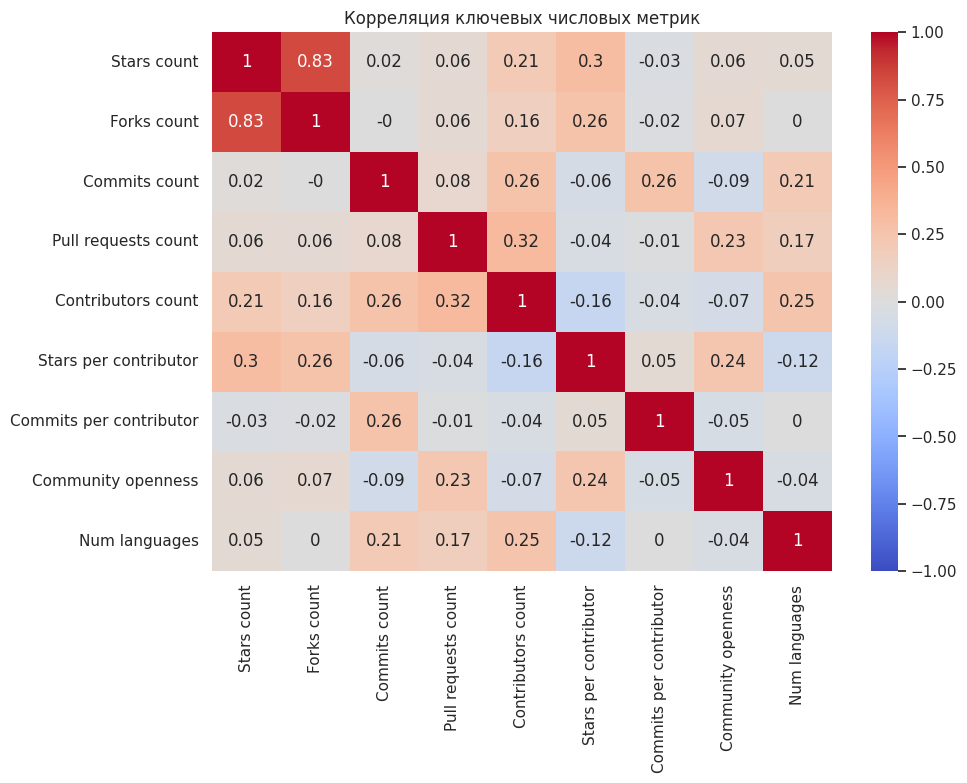

In [92]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция ключевых числовых метрик')
plt.show()

**Вывод по корреляции.** Самая сильная связь наблюдается между числами звёзд и форков, чуть слабее — между звёздами и количеством контрибьюторов. Почти отсутствует линейная связь между числом языков и активностными метриками, что видно по низким корреляциям в соответствующих строках/столбцах.

## 5.2 Популярность языков и стэков

#### Посмотрим, какие языки чаще всего встречаются как основной язык репозитория.


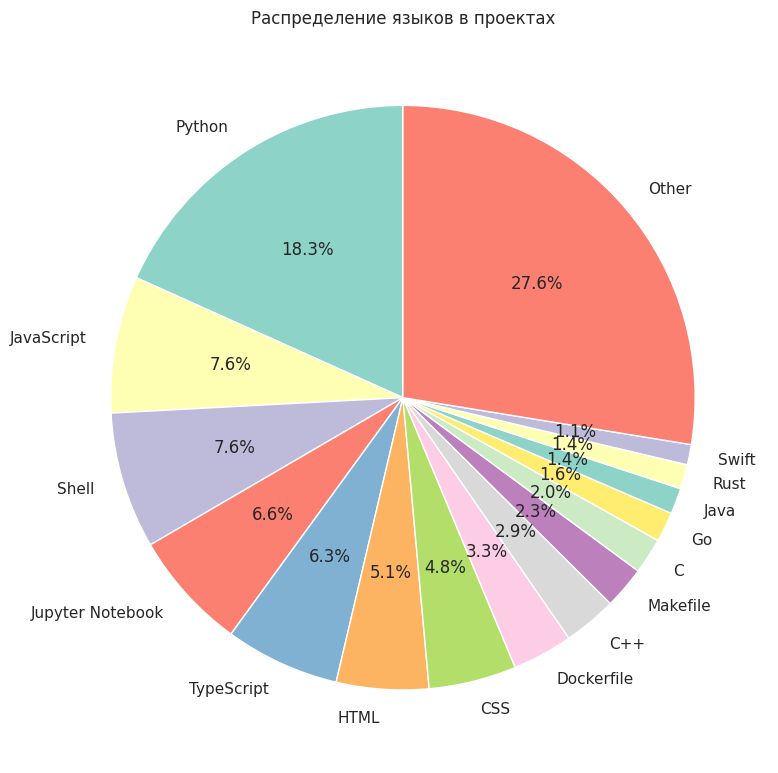

In [93]:
lang_series = df['Programming languages'].apply(
    lambda x: x if isinstance(x, list) else ast.literal_eval(x) if isinstance(x, str) else []
)
lang_counts = lang_series.explode().value_counts()
language_percent = (lang_counts / lang_counts.sum()) * 100

# языки с долей >= 1%, остальные в Other
top_languages = language_percent[language_percent >= 1]
other_percent = 100 - top_languages.sum()

languages_for_pie = pd.concat([top_languages, pd.Series({'Other': other_percent})])

# если вдруг есть несколько 'Other', объединяем их в один (так как в данныз есть изначально other )
if 'Other' in languages_for_pie.index:
    other_total = languages_for_pie[languages_for_pie.index == 'Other'].sum()
    languages_for_pie = languages_for_pie[languages_for_pie.index != 'Other']
    languages_for_pie.loc['Other'] = other_total

plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set3', n_colors=len(languages_for_pie))
languages_for_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, legend=False)
plt.title('Распределение языков в проектах')
plt.ylabel('')
plt.tight_layout()
plt.show()


### Средние звёзды по стэку

**Цель подсчёта средних звёзд по стэку.** Хотим понять, дают ли разные комбинации языков заметное преимущество по популярности и выделяются ли гибридные стэки среди лидеров.


In [94]:

stacked_langs = lang_series.apply(lambda x: ", ".join(x) if isinstance(x, list) else str(x))
mean_stars_by_stack = (
    df.assign(Stack=stacked_langs)
      .groupby('Stack')['Stars count']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)
mean_stars_by_stack


,Stars count
Stack,
"Python, JavaScript, TypeScript, HTML, CSS, PLpgSQL",81474.0
"Rust, TypeScript, JavaScript, Other",54341.0
"Jupyter Notebook, Python, Dockerfile",47707.0
"Python, PowerShell, Shell, Batchfile",44866.0
"Java, Vue, Less, TypeScript, Python, Dockerfile",44552.0
"Jupyter Notebook, Python, HTML, Vue, JavaScript, Dockerfile",44065.0
"Python, TypeScript, Shell, Batchfile, CSS, Mako",42521.0
"Python, JavaScript, CSS, Jupyter Notebook, HTML, Shell",41794.0
"TypeScript, JavaScript, CSS, Python, Shell",41499.0


**Выводы по языкам и популярности.** Python остаётся главным языком выборки; далее идут JavaScript/TypeScript и Shell. В топовых по звёздам стэках чаще встречается сочетание Python с фронтенд-языками, то есть гибридные проекты собирают больше внимания, чем одиночные инфраструктурные репозитории.


### План визуализаций по языкам
Мы исследуем популярность технологий и связь метрик активности с популярностью репозиториев: топовые языки, распределения звёзд/форков по стеку, форма зависимости Stars-Forks, корреляции активности (Commits, PRs, Contributors, Stars) и влияние количества контрибьюторов/PR на звёзды.
Отдельно смотрим на `hype score`, чтобы сопоставить модные темы с популярностью.


### Топ-5 языков
Визуализируем топ-5 основных языков, чтобы оценить технологическую популярность в выборке.


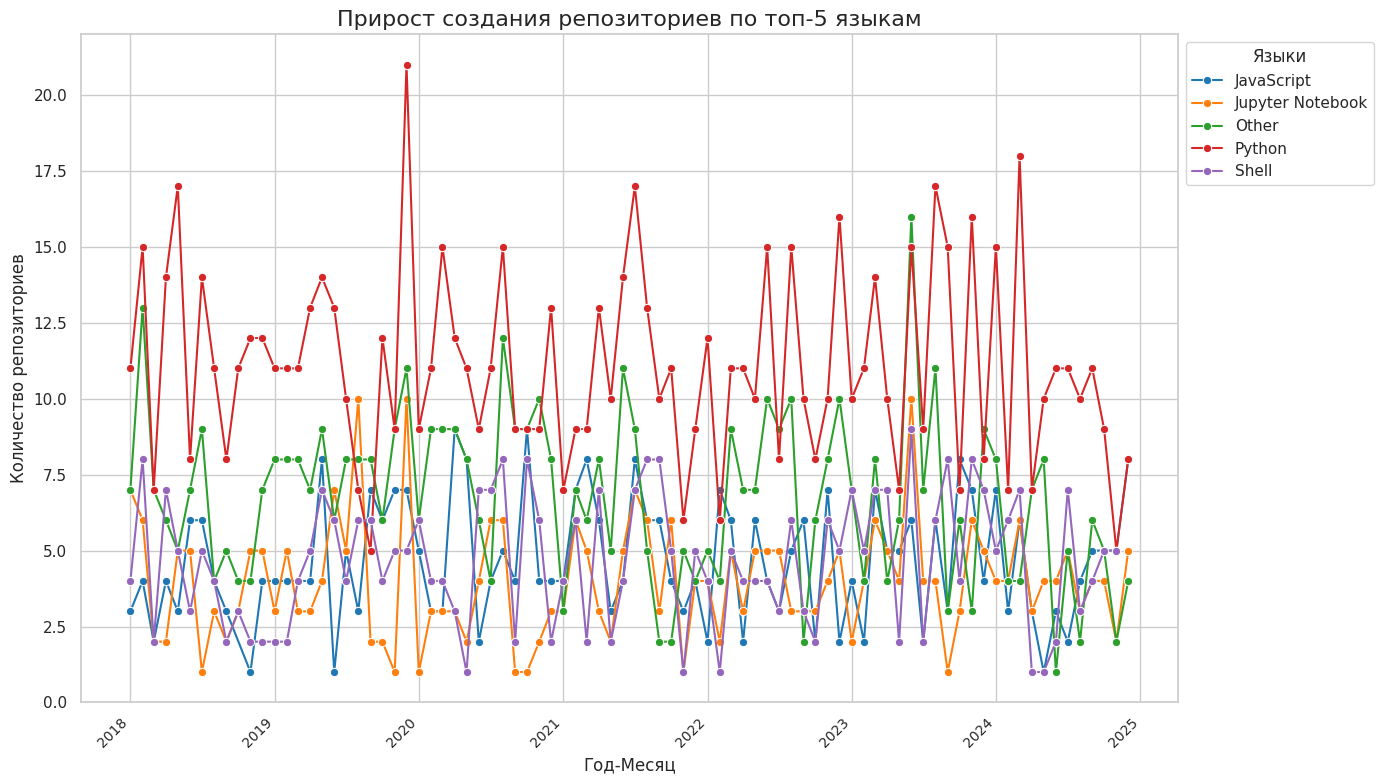

In [100]:

# Преобразуем столбец 'Created' в datetime и разворачиваем списки языков
created_dt = pd.to_datetime(df['Created'], errors='coerce')
timeline = pd.DataFrame({
    'Created': created_dt,
    'Programming languages': lang_series
}).explode('Programming languages').dropna(subset=['Programming languages'])

# Отбираем топ-5 языков по количеству репозиториев
top_5_languages = timeline['Programming languages'].value_counts().head(5).index
trend_data = (
    timeline[timeline['Programming languages'].isin(top_5_languages)]
    .assign(**{'Year-Month': lambda d: d['Created'].dt.to_period('M').dt.to_timestamp()})
    .groupby(['Year-Month', 'Programming languages'])
    .size()
    .reset_index(name='Repositories')
)

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=trend_data,
    x='Year-Month',
    y='Repositories',
    hue='Programming languages',
    marker='o',
    dashes=False,
    palette='tab10'
)
plt.title('Прирост создания репозиториев по топ-5 языкам', fontsize=16)
plt.xlabel('Год-Месяц', fontsize=12)
plt.ylabel('Количество репозиториев', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Языки', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



**Вывод по топ-5 языкам.** Python и JavaScript уверенно лидируют по числу репозиториев; TypeScript, Shell и Jupyter Notebook формируют следующий кластер, отражая популярность веб- и data-стеков. Лидеры сохраняют отрыв на всём горизонте наблюдения.


### Распределения звёзд/форков по топ-5 языкам
Сравниваем разброс популярности по стеку через boxplot/violin.


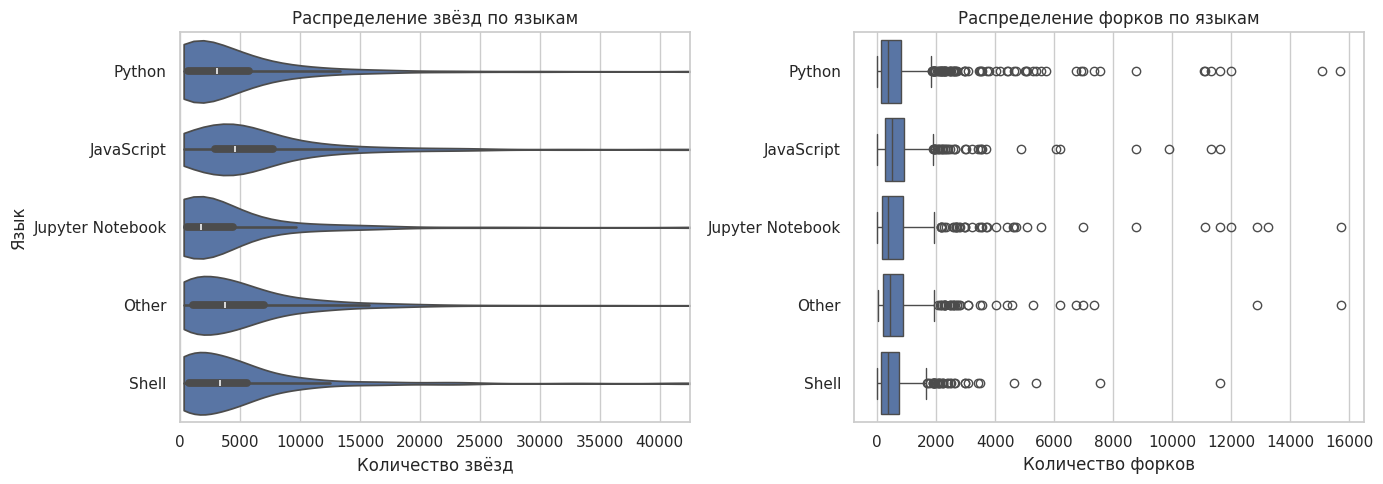

In [96]:

lang_long = (
    df[['Stars count', 'Forks count']]
    .assign(**{'Programming languages': lang_series})
    .explode('Programming languages')
    .query('`Programming languages` in @top_5_languages')
    .dropna(subset=['Programming languages'])
)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
stars_q99 = lang_long['Stars count'].quantile(0.99)
sns.violinplot(
    data=lang_long,
    x='Stars count',
    y='Programming languages',
    cut=0,
    ax=axes[0]
)
axes[0].set_title('Распределение звёзд по языкам')
axes[0].set_xlabel('Количество звёзд')
axes[0].set_ylabel('Язык')
axes[0].set_xlim(0, stars_q99)

sns.boxplot(
    data=lang_long,
    x='Forks count',
    y='Programming languages',
    ax=axes[1]
)
axes[1].set_title('Распределение форков по языкам')
axes[1].set_xlabel('Количество форков')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

**Вывод по распределениям.** У Python самый широкий разброс звёзд и форков: встречаются как небольшие, так и очень популярные проекты. JavaScript и TypeScript сгруппированы ближе к средним значениям, а Shell и Jupyter Notebook дают более компактные распределения, что отражает их нишевые сценарии.


## 5.3 Связи метрик и активность

#### Scatter Stars–Forks в лог-шкале
Проверяем форму связи между звёздами и форками в логарифмическом масштабе.


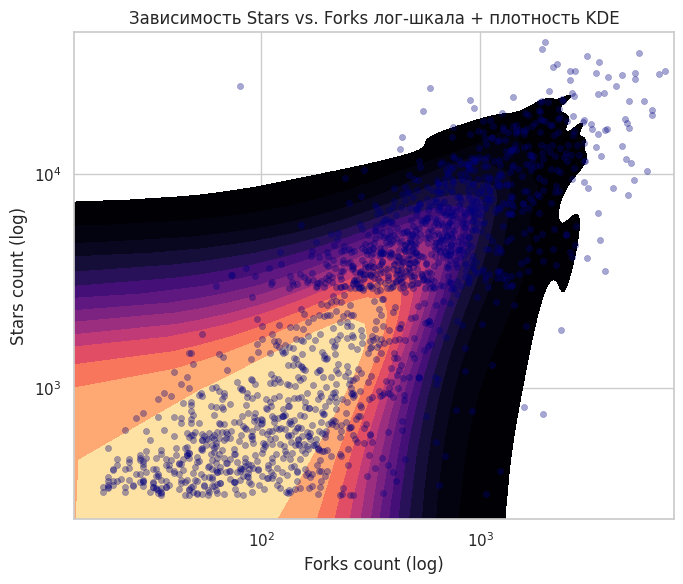

In [97]:
scatter_df = df[(df['Stars count'] > 0) & (df['Forks count'] > 0)].copy()
low = scatter_df[['Stars count', 'Forks count']].quantile(0.01)
high = scatter_df[['Stars count', 'Forks count']].quantile(0.99)
scatter_df = scatter_df[
    scatter_df['Stars count'].between(low['Stars count'], high['Stars count']) &
    scatter_df['Forks count'].between(low['Forks count'], high['Forks count'])
]

fig, ax = plt.subplots(figsize=(7, 6))
sns.kdeplot(
    data=scatter_df,
    x='Forks count',
    y='Stars count',
    fill=True,
    thresh=0.05,
    levels=15,
    cmap='magma',
    ax=ax,
)
sns.scatterplot(
    data=scatter_df,
    x='Forks count',
    y='Stars count',
    alpha=0.35,
    s=20,
    color='navy',
    edgecolor=None,
    ax=ax,
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Forks count (log)')
ax.set_ylabel('Stars count (log)')
ax.set_title('Зависимость Stars vs. Forks лог-шкала + плотность KDE')
plt.tight_layout()

**Вывод по Stars–Forks.** В логарифмической шкале точки выстраиваются почти в линию: чем больше форков, тем больше звёзд. Сверхпопулярные репозитории формируют редкие выбросы, а основное облако показывает типичную степенную зависимость.


#### Коррелограмма ключевых метрик
Ищем взаимосвязи между Stars, Forks, Commits, PR и Contributors.


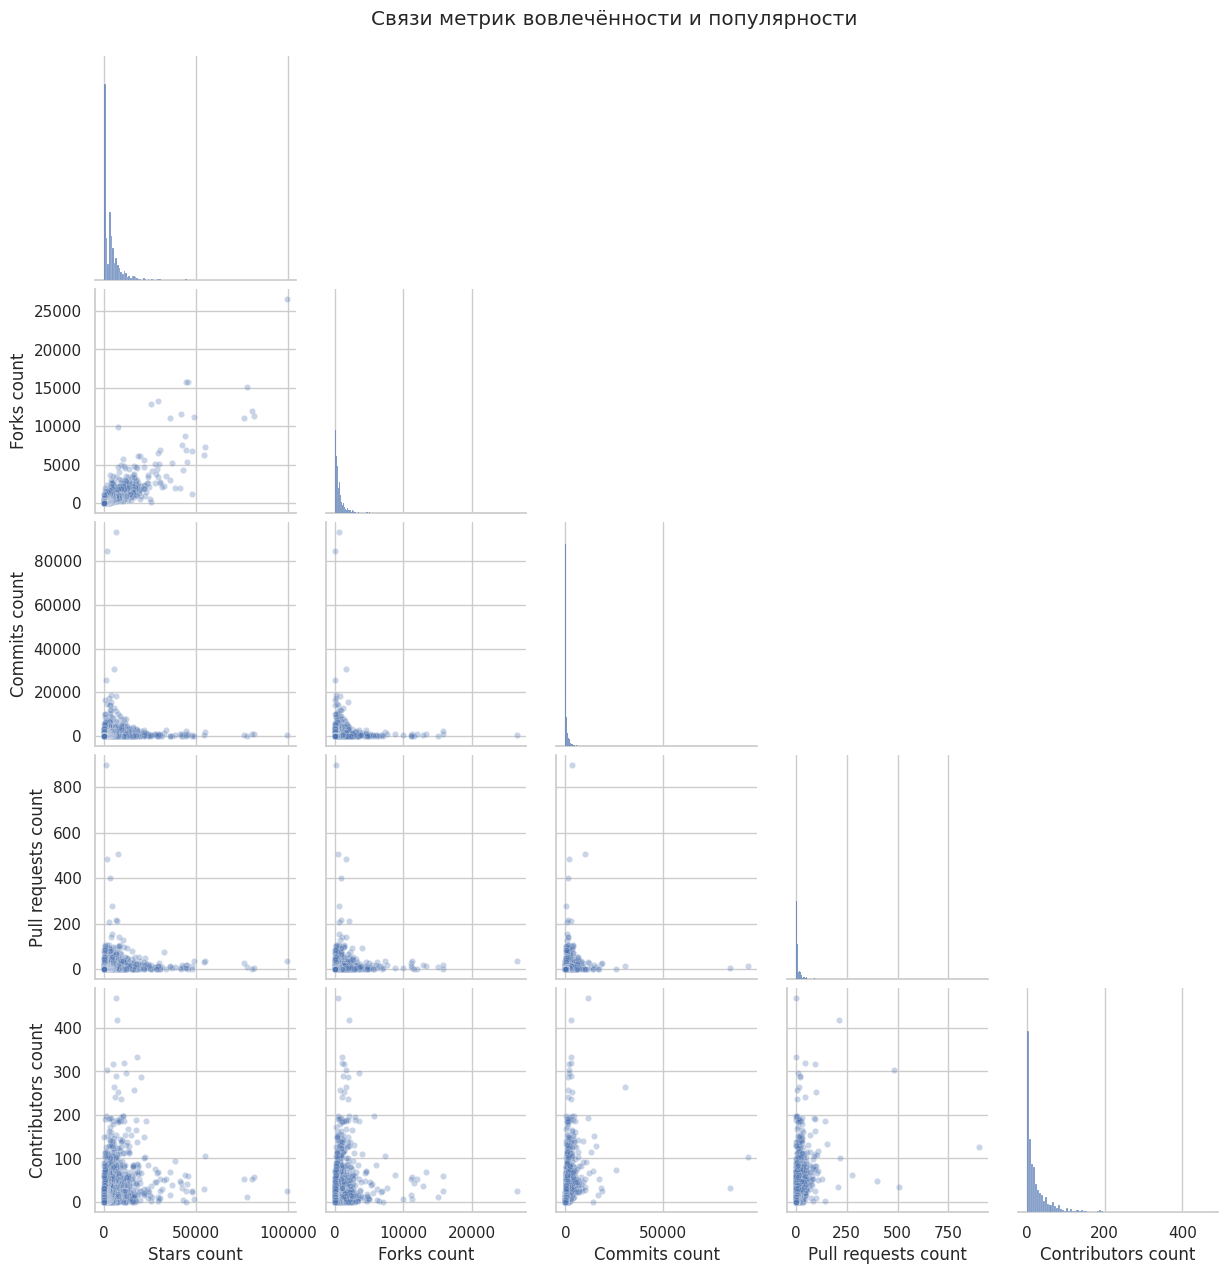

In [98]:
activity_cols = ['Stars count', 'Forks count', 'Commits count', 'Pull requests count', 'Contributors count']
sns.set_theme(style='whitegrid')
g = sns.pairplot(
    df[activity_cols],
    corner=True,
    diag_kind='hist',
    plot_kws={'alpha': 0.3, 's': 20}
)
g.fig.suptitle('Связи метрик вовлечённости и популярности', y=1.02)
plt.show()


**Вывод по коррелограмме.** Самая заметная связь — между звёздами и форками. Больше коммитов и PR идёт рука об руку с ростом числа контрибьюторов, тогда как количество языков почти не влияет на популярность.


#### Трендлайны влияния контрибьюторов и PR на звёзды
Сравниваем наклоны линий зависимости Stars от числа контрибьюторов и PR.


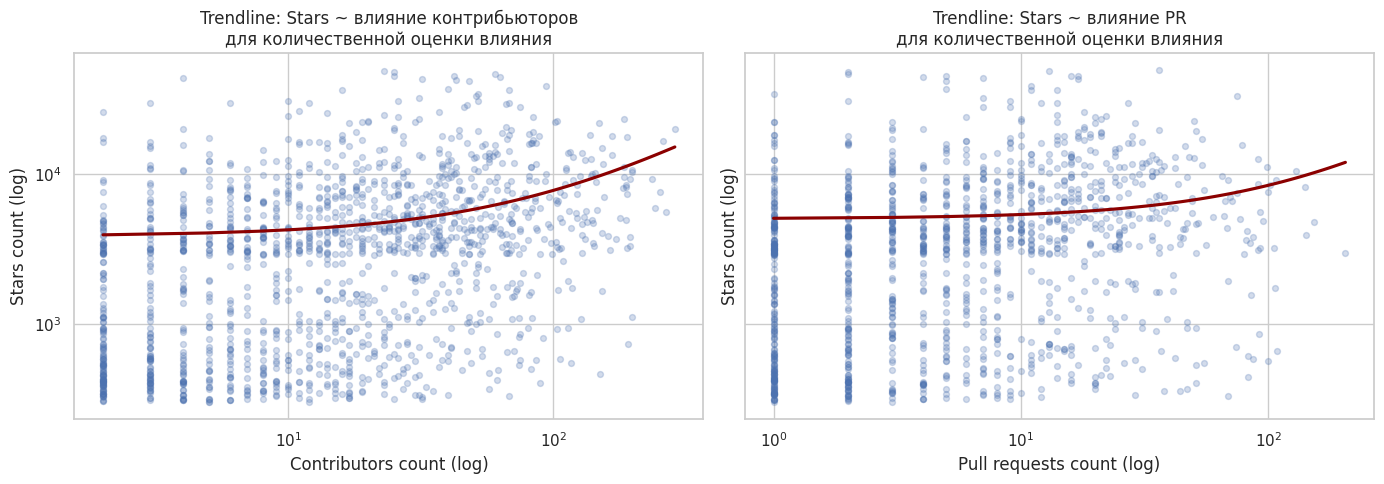

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for ax, (xcol, title) in zip(axes, [('Contributors count', 'влияние контрибьюторов'), ('Pull requests count', 'влияние PR')]):
    reg_df = df[(df['Stars count'] > 0) & (df[xcol] > 0)]
    reg_df = reg_df[
        (reg_df['Stars count'] < reg_df['Stars count'].quantile(0.995)) &
        (reg_df[xcol] < reg_df[xcol].quantile(0.995))
    ]
    sns.regplot(
        data=reg_df,
        x=xcol,
        y='Stars count',
        scatter_kws={'alpha': 0.25, 's': 18},
        line_kws={'color': 'darkred'},
        ci=None,
        ax=ax
    )
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f"Trendline: Stars ~ {title}\nдля количественной оценки влияния")
    ax.set_xlabel(f"{xcol} (log)")
    ax.set_ylabel('Stars count (log)')
plt.tight_layout()


**Вывод по трендовым линиям.** При увеличении числа контрибьюторов звёзды растут быстрее, чем при росте количества PR: дополнительный участник даёт больший вклад, а объём PR работает скорее как поддерживающий фактор.


## 5.4 Итоговые выводы EDA
- **Главные языки.** Большая часть репозиториев построена на Python (что ожидаемо для AI/ML-проектов); далее идут JavaScript и TypeScript, поддерживаемые нишевыми Shell и Jupyter Notebook.
- **Распределения популярности.** У звёзд и форков длинные правые хвосты: большинство проектов набирают умеренные показатели, но есть редкие лидеры с десятками тысяч оценок.
- **Связи метрик.** Звёзды системно растут вместе с форками; активность (коммиты, PR) и число контрибьюторов также двигаются в одну сторону, но эффект слабее, чем у пары Stars–Forks.
- **Роль сообщества.** Больше участников даёт более заметный прирост звёзд, чем просто увеличение числа PR, поэтому вовлечение людей важнее, чем объём изменений.


# 6. Итоговые выводы исследования

- Матвей: собран единый датасет результатов глобального поиска GitHub по тегам AI и ML; учтены базовые метрики популярности (stars, forks) и активности (commits, PR), что даёт достаточно данных для сопоставления проектов.
- Дина: в результате очистки мы получили однородный набор уникальных репозиториев без пропусков в ключевых полях и с согласованными числовыми метриками, что позволяет корректно сравнивать проекты по звёздам, форкам и активности. Нормализация столбца с языками и аккуратная работа с выбросами убрали “шум” и технические аномалии, сохранив при этом репозитории-лидеры. Это особенно важно для выбранных AI и ML тегов: именно в этих тематиках распределения популярности сильнее всего скошены, и без качественной очистки было бы сложно объективно оценивать, на каких языках развивается AI/ML-экосистема и какие проекты действительно выделяются, а какие кажутся “топами” только из-за артефактов данных.
- Лена: новые созданные признаки позволяют сравнивать проекты с разным размером команды, оценивать структуру стека, понять, насколько проект открыт к внешнему вкладу, а также оценить влияние хайпа. Мы видим не только «крупные» проекты по звёздам, но и небольшие, но эффективные команды. С помощью новых признаков можно формулировать и проверять содержательные гипотезы. В сумме созданные признаки переводят абсолютные значения в относительные (на участника, по доле PR, по широте стека), что помогает сравнить проекты разных размеров и типов. Они делают стек и тематику измеримыми (Num languages, Has backend, Hype score, ...) и добавляют время "жизни" проекта (Created, Last updated), пусть и в условных единицах.
- Дима: EDA подтвердил доминирование Python в AI/ML-репозиториях, показал длинные хвосты распределений популярности, сильную пару Stars–Forks и значение ширины сообщества: рост числа контрибьюторов ускоряет набор звёзд сильнее, чем просто увеличение объёма PR.

**Общие выводы:**
- Экосистема AI/ML в GitHub сосредоточена вокруг Python, при поддержке веб-стека для фронтенда/демо (JavaScript/TypeScript) и утилитарных скриптов (Shell).
- Популярность проектов следует степенному распределению: немногочисленные лидеры собирают десятки тысяч звёзд, но большинство репозиториев остаются в умеренном диапазоне.
- Ключевая связка популярности — звёзды и форки; вовлечённое сообщество (контрибьюторы + PR) усиливает этот рост, особенно когда команда расширяется.
- Относительные метрики (на участника, по доле PR, по числу языков) позволяют сравнивать проекты разного масштаба без потери контекста.

**Ограничения и дальнейшая работа:** данные собраны только по результатам поиска GitHub, поэтому распределение может смещаться в сторону хорошо индексируемых репозиториев; полезно расширить источники (API, дополнительные теги) и ввести временной анализ активности.
